In [2]:
from pydeseq2.ds import DeseqStats
!pip install anndata

In [3]:
import anndata as ad
import pandas as pd

In [59]:
ppmi_ad = ad.read_h5ad("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/ppmi_adata.h5ad")

In [5]:
!pip install pydeseq2

In [64]:
adata = ppmi_ad[(ppmi_ad.obs["Gender"] == "Male") &
                (ppmi_ad.obs["Visit"] == "BL") &
                (ppmi_ad.obs["Diagnosis"].isin(["PD", "Control"]))]

In [63]:
ppmi_ad.obs['Age_Group'].unique()

['50-70', '70-80', '30-50', NaN, '>80', 'Unknown']
Categories (5, object): ['30-50', '50-70', '70-80', '>80', 'Unknown']

In [65]:
adata[adata.obs["Age_Group"] == "50-70"].obs["Diagnosis"].value_counts()

Diagnosis
PD         166
Control     80
Name: count, dtype: int64

In [36]:
cell_props = pd.read_csv("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/cibersortx_metadata_df.csv", index_col=0)

In [27]:
counts_log2 = pd.DataFrame(adata.layers['counts_log2'], index=adata.obs_names, columns=adata.var_names)

In [29]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
filtered_counts = selector.fit_transform(counts_log2)
filtered_genes = counts_log2.columns[selector.get_support()]
filtered_genes

Index(['ENSG00000223972.5', 'ENSG00000227232.5', 'ENSG00000278267.1',
       'ENSG00000243485.5', 'ENSG00000237613.2', 'ENSG00000268020.3',
       'ENSG00000240361.2', 'ENSG00000186092.6', 'ENSG00000238009.6',
       'ENSG00000233750.3',
       ...
       'ENSG00000273739.1', 'ENSG00000276700.1', 'ENSG00000276312.1',
       'ENSG00000275757.1', 'ENSG00000278573.1', 'ENSG00000276017.1',
       'ENSG00000278817.1', 'ENSG00000277196.4', 'ENSG00000278625.1',
       'ENSG00000277374.1'],
      dtype='object', length=57286)

In [37]:
filtered_cell_meta = cell_props.loc[adata.obs["Sample"],:]

In [38]:
filtered_cell_meta.head()

,B cells naive,B cells memory,Plasma cells,T cells CD8,T cells CD4 naive,T cells CD4 memory resting,T cells CD4 memory activated,T cells follicular helper,T cells regulatory (Tregs),T cells gamma delta,...,Eosinophils,Neutrophils,P-value,Correlation,RMSE,Diagnosis,Visit,Gender,Genetic_Group,Age_Group
Mixture,,,,,,,,,,,,,,,,,,,,,
3471.BL.PP0015.6713.5104.SL.0007,0.010364,0.008340,0.0,0.000000,0.176513,0.058604,0.013397,0,0.0,0.000000,...,0.000000,0.359522,0,0.900986,0.518223,PD,BL,Male,NaN,70-80
3435.BL.PP0015.8880.5104.SL.0011,0.010684,0.002010,0.0,0.010238,0.121306,0.156061,0.009448,0,0.0,0.000000,...,0.000000,0.322555,0,0.887439,0.545949,PD,BL,Male,SRDC,50-70
3479.BL.PP0021.2283.5104.SL.0021,0.007398,0.003453,0.0,0.000000,0.143299,0.138561,0.036220,0,0.0,0.020478,...,0.005641,0.271101,0,0.860936,0.593208,Control,BL,Male,NaN,50-70
4110.BL.0003150414.5104.SL.0026,0.023685,0.000000,0.0,0.000000,0.205892,0.031398,0.009099,0,0.0,0.000000,...,0.012469,0.287567,0,0.867439,0.579053,PD,BL,Male,NaN,70-80
3174.BL.PP0015.7985.5104.SL.0027,0.002609,0.006557,0.0,0.000000,0.218058,0.128217,0.025315,0,0.0,0.000000,...,0.000000,0.269151,0,0.874726,0.579109,PD,BL,Male,SRDC,50-70


In [39]:
filtered_cell_meta = filtered_cell_meta.loc[:, filtered_cell_meta.columns.isin(["Diagnosis", "Neutrophils", "Monocytes", "T cells CD4 naive", "NK cells activated", "NK cells resting", "T cells CD4 memory resting"])] #~filtered_cell_meta.columns.isin(["P-value", "Correlation", "RMSE", "Visit", "Gender", "Genetic_Group", "Age_Group"])]

In [40]:
filtered_cell_meta = filtered_cell_meta.loc[:, filtered_cell_meta.sum(axis=0) != 0]

In [41]:
filtered_cell_meta.columns = (filtered_cell_meta.columns
                              .str.replace(" ", "_")
                              .str.replace("-", "_")
                              .str.replace(r"\(|\)", "", regex=True))

In [42]:
design_factors = filtered_cell_meta.columns.values.tolist()

In [43]:
design_factors

['T_cells_CD4_naive',
 'T_cells_CD4_memory_resting',
 'NK_cells_resting',
 'NK_cells_activated',
 'Monocytes',
 'Neutrophils',
 'Diagnosis']

In [44]:
filtered_cell_meta.head()

,T_cells_CD4_naive,T_cells_CD4_memory_resting,NK_cells_resting,NK_cells_activated,Monocytes,Neutrophils,Diagnosis
Mixture,,,,,,,
3471.BL.PP0015.6713.5104.SL.0007,0.176513,0.058604,0.095373,0.0,0.261202,0.359522,PD
3435.BL.PP0015.8880.5104.SL.0011,0.121306,0.156061,0.097294,0.0,0.265266,0.322555,PD
3479.BL.PP0021.2283.5104.SL.0021,0.143299,0.138561,0.083524,0.0,0.272197,0.271101,Control
4110.BL.0003150414.5104.SL.0026,0.205892,0.031398,0.139821,0.0,0.275920,0.287567,PD
3174.BL.PP0015.7985.5104.SL.0027,0.218058,0.128217,0.098402,0.0,0.248029,0.269151,PD


In [45]:
df = adata.to_df()
df = df.loc[:, filtered_genes]
df.head()

,ENSG00000223972.5,ENSG00000227232.5,ENSG00000278267.1,ENSG00000243485.5,ENSG00000237613.2,ENSG00000268020.3,ENSG00000240361.2,ENSG00000186092.6,ENSG00000238009.6,ENSG00000233750.3,...,ENSG00000273739.1,ENSG00000276700.1,ENSG00000276312.1,ENSG00000275757.1,ENSG00000278573.1,ENSG00000276017.1,ENSG00000278817.1,ENSG00000277196.4,ENSG00000278625.1,ENSG00000277374.1
3471.BL.PP0015.6713.5104.SL.0007,0,97,8,0,0,0,0,2,124,2,...,0,9,0,1,0,0,7,1,0,0
3435.BL.PP0015.8880.5104.SL.0011,15,209,6,8,6,6,19,7,176,29,...,2,12,7,0,6,2,32,17,0,0
3479.BL.PP0021.2283.5104.SL.0021,3,107,3,0,0,0,0,0,35,0,...,1,0,6,0,0,0,28,0,0,0
4110.BL.0003150414.5104.SL.0026,0,90,3,0,0,0,0,1,75,0,...,0,0,3,0,0,0,8,0,0,0
3174.BL.PP0015.7985.5104.SL.0027,7,239,5,0,0,0,0,0,110,1,...,0,0,0,0,0,2,9,0,0,0


In [46]:
from pydeseq2.ds import DeseqDataSet
dds = DeseqDataSet(counts=df, metadata=filtered_cell_meta, design_factors=design_factors) #metadata=filtered_cell_meta, design_factors=design_factors, ref_level="Control")

/var/folders/qb/t7qv2b9n33n2xzbjvg_dk_4c0000gn/T/ipykernel_19146/2293354848.py:2: DeprecationWarning: design_factors is deprecated and will soon be removed.Please consider providing a formulaic formula using the design argumentinstead.
  dds = DeseqDataSet(counts=df, metadata=filtered_cell_meta, design_factors=design_factors) #metadata=filtered_cell_meta, design_factors=design_factors, ref_level="Control")


In [47]:
dds.deseq2()

Fitting size factors...


Using None as control genes, passed at DeseqDataSet initialization


... done in 1.17 seconds.

Fitting dispersions...
... done in 80.55 seconds.

Fitting dispersion trend curve...
... done in 2.00 seconds.

Fitting MAP dispersions...
... done in 85.62 seconds.

Fitting LFCs...
... done in 205.04 seconds.

Calculating cook's distance...
... done in 3.04 seconds.

Replacing 0 outlier genes.



In [48]:
contrast = ("Diagnosis", "PD", "Control")
deseq_stats = DeseqStats(dds, contrast=contrast)
deseq_stats.summary()
deg_results = deseq_stats.results_df
deg_results.head()

Running Wald tests...
... done in 12.77 seconds.



Log2 fold change & Wald test p-value: Diagnosis PD vs Control
                     baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSG00000223972.5    7.767234       -0.250935  0.151589 -1.655362  0.097851   
ENSG00000227232.5  101.627474       -0.193215  0.067494 -2.862682  0.004201   
ENSG00000278267.1   12.701854       -0.142006  0.102877 -1.380338  0.167482   
ENSG00000243485.5    2.192026       -0.536396  0.378107 -1.418636  0.156005   
ENSG00000237613.2    1.666565        0.939739  0.524259  1.792507  0.073052   
...                       ...             ...       ...       ...       ...   
ENSG00000276017.1    1.384704        0.732403  0.524818  1.395538  0.162854   
ENSG00000278817.1    8.469801       -0.082486  0.096768 -0.852416  0.393983   
ENSG00000277196.4    2.638052       -0.421537  0.360324 -1.169884  0.242048   
ENSG00000278625.1    0.147302       -0.134180  0.718997 -0.186621  0.851958   
ENSG00000277374.1    0.026067       -0.060807  3.126723 -0.019448  0.

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
ENSG00000223972.5,7.767234,-0.250935,0.151589,-1.655362,0.097851,0.449783
ENSG00000227232.5,101.627474,-0.193215,0.067494,-2.862682,0.004201,0.393251
ENSG00000278267.1,12.701854,-0.142006,0.102877,-1.380338,0.167482,0.496389
ENSG00000243485.5,2.192026,-0.536396,0.378107,-1.418636,0.156005,0.487231
ENSG00000237613.2,1.666565,0.939739,0.524259,1.792507,0.073052,0.440417


In [49]:
deg_results['abs_log2FoldChange'] = deg_results['log2FoldChange'].abs()
deg_results['padj'] = deg_results['padj'].fillna(1)
deg_results.sort_values(by=["abs_log2FoldChange", "padj"], ascending=[False, True])

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,abs_log2FoldChange
ENSG00000261939.1,0.644424,-43.280851,5.154343,-8.396967,4.581583e-17,2.624606e-12,43.280851
ENSG00000278591.1,1.205526,43.158340,57.324626,0.752876,4.515244e-01,7.481568e-01,43.158340
ENSG00000265590.9,0.446448,-26.872851,720.938154,-0.037275,9.702659e-01,9.996631e-01,26.872851
ENSG00000204450.7,0.719442,14.760835,35.137699,0.420085,6.744231e-01,9.124231e-01,14.760835
ENSG00000222202.1,0.688527,14.173011,57.651646,0.245839,8.058070e-01,9.691538e-01,14.173011
...,...,...,...,...,...,...,...
ENSG00000160087.20,1320.335566,-0.000007,0.022868,-0.000327,9.997389e-01,9.999157e-01,0.000007
ENSG00000092847.11,2650.189171,0.000006,0.029270,0.000208,9.998339e-01,9.999448e-01,0.000006
ENSG00000086504.16,599.329787,0.000005,0.027330,0.000200,9.998401e-01,9.999448e-01,0.000005
ENSG00000196177.12,603.933995,0.000005,0.019379,0.000281,9.997760e-01,9.999157e-01,0.000005


In [51]:
deg_results_sign = deg_results[(deg_results['abs_log2FoldChange'] >= 0.5) & (deg_results['padj'] <= 0.05)]
deg_results_sign.sort_values(by=["abs_log2FoldChange", "padj"], ascending=[False, False])

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,abs_log2FoldChange
ENSG00000261939.1,0.644424,-43.280851,5.154343,-8.396967,4.581583e-17,2.624606e-12,43.280851
ENSG00000277720.1,0.647137,-6.847752,1.478054,-4.632951,3.604902e-06,1.331217e-02,6.847752
ENSG00000274128.1,0.649044,-4.931670,1.065950,-4.626549,3.718095e-06,1.331217e-02,4.931670
ENSG00000238145.2,0.694429,-4.698193,0.931175,-5.045448,4.524607e-07,3.171908e-03,4.698193
ENSG00000273730.1,3.360346,-4.633354,0.603031,-7.683443,1.548684e-14,4.435896e-10,4.633354
ENSG00000284356.1,0.475261,3.512510,0.811044,4.330851,1.485341e-05,4.727180e-02,3.512510
ENSG00000279466.1,0.712112,-2.823020,0.637301,-4.429649,9.438677e-06,3.180612e-02,2.823020
ENSG00000199964.1,0.620213,-2.742635,0.453136,-6.052567,1.425557e-09,2.722149e-05,2.742635
ENSG00000223565.1,1.397391,-2.130725,0.444737,-4.790972,1.659753e-06,7.313893e-03,2.130725
ENSG00000243366.3,55.559840,2.004203,0.342200,5.856825,4.718009e-09,6.756896e-05,2.004203


In [50]:
deg_results[deg_results["abs_log2FoldChange"] >= 40]

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,abs_log2FoldChange
ENSG00000261939.1,0.644424,-43.280851,5.154343,-8.396967,4.581583e-17,2.624606e-12,43.280851
ENSG00000278591.1,1.205526,43.158340,57.324626,0.752876,4.515244e-01,7.481568e-01,43.158340


In [52]:
deg_results = deg_results.drop(index=deg_results[deg_results["abs_log2FoldChange"] >= 40].index)

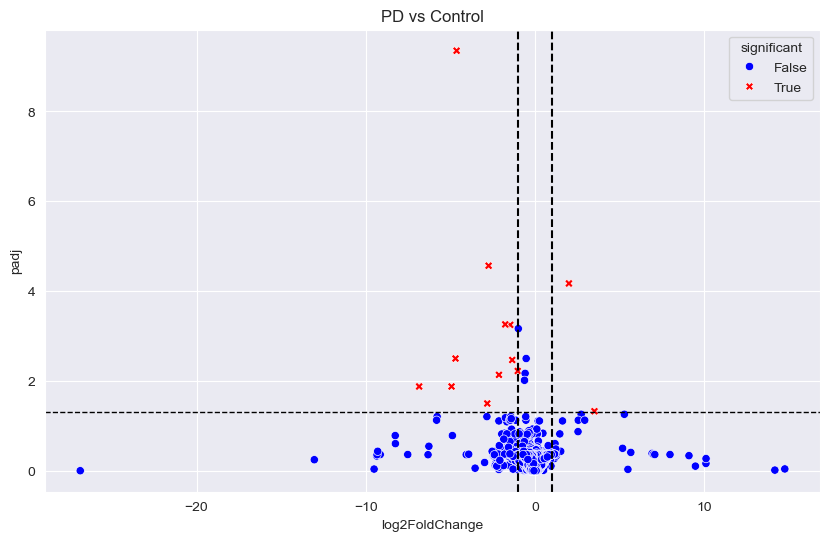

In [68]:
deg_results['significant'] = (deg_results['padj'] < 0.05) & (deg_results['abs_log2FoldChange'] > 1)
deg_results['significant'] = deg_results['significant'].astype(bool)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(10,6))



scatter = sns.scatterplot(data=deg_results, x=deg_results['log2FoldChange'],
            y=-np.log10(deg_results['padj']),
            hue=deg_results['significant'],
            palette={True: 'red', False: 'blue'},
            style=deg_results['significant']
          )
plt.axvline(-1, color='k', linestyle='--')
plt.axvline(1, color='k', linestyle='--')
plt.axhline(y=-np.log10(0.05), color='black', linestyle='--', linewidth=1)
plt.title("PD vs Control")
plt.show()

In [56]:
ppmi_deg_males_control_pd_baselines = ad.AnnData(deg_results)

In [57]:
deg_genes_symbols = adata.varm['symbol_ensembl_mapping'].loc[deg_results.index]
ppmi_deg_males_control_pd_baselines.varm['symbol_ensembl_mapping'] = deg_genes_symbols.reindex(ppmi_deg_males_control_pd_baselines.var_names)

In [58]:
ppmi_deg_males_control_pd_baselines.varm['symbol_ensembl_mapping']['gene_symbol'] = ppmi_deg_males_control_pd_baselines.varm['symbol_ensembl_mapping']['gene_symbol'].astype(str)
ppmi_deg_males_control_pd_baselines.varm['symbol_ensembl_mapping']['trunc_eid'] = ppmi_deg_males_control_pd_baselines.varm['symbol_ensembl_mapping']['trunc_eid'].astype(str)
ppmi_deg_males_control_pd_baselines.write_h5ad("/Users/kpax/Documents/aep/study/MSC/lab/PPMI_Project_133_RNASeq/ppmi_deg_males_control_pd_baselines.h5ad")